In [1]:
import os
os.chdir("..")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tutorial import util

tf.logging.set_verbosity(tf.logging.ERROR)
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

%matplotlib inline

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [3]:
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

In [4]:
print('train_data.shape: ', train_data.shape)
print('train_labels.shape: ', train_labels.shape)

train_data.shape:  (55000, 784)
train_labels.shape:  (55000,)


category: 7, 


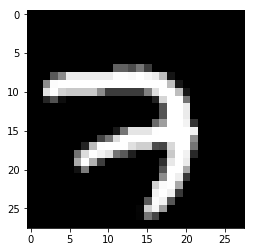

In [5]:
img = train_data[0]
img = img.reshape([28, 28]);
plt.gray()
plt.imshow(img);
print('category: %d, ' % (train_labels[0]))

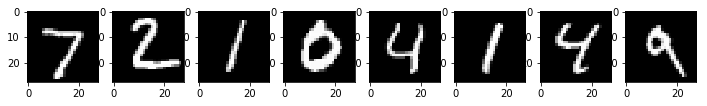

labels:  [7 2 1 0 4 1 4 9]


In [6]:
fig=plt.figure(figsize=(12, 2))
for i in range(8):
    img = eval_data[i].reshape([28,28])
    fig.add_subplot(1, 8, i+1)
    plt.imshow(img)
plt.show()
print('labels: ', str(eval_labels[:8]))

In [7]:
from tutorial.cnn_mnist import cnn_model_fn
model_dir = '/Users/larrysu/repos/totem/model/cnn_mnist_180329_112417_gpu'
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir=model_dir)

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": eval_data[:8]},
        num_epochs=1,
        shuffle=False)

predictions = list(mnist_classifier.predict(input_fn=predict_input_fn))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/Users/larrysu/repos/totem/model/cnn_mnist_180329_112417_gpu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1226e19e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /Users/larrysu/repos/totem/model/cnn_mnist_180329_112417_gpu/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


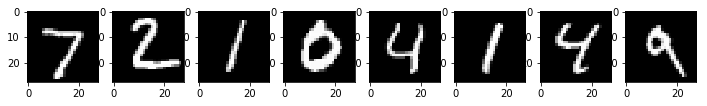

labels:  [7 2 1 0 4 1 4 9]
      7 ,       2 ,       1 ,       0 ,       4 ,       1 ,       4 ,       9 , 
 0.9997 ,  0.9996 ,  0.9957 ,  0.9996 ,  0.9968 ,  0.9980 ,  0.9941 ,  0.9792 , 

In [8]:
fig=plt.figure(figsize=(12, 2))
for i in range(8):
    img = eval_data[i].reshape([28,28])
    fig.add_subplot(1, 8, i+1)
    plt.imshow(img)
plt.show()
print('labels: ', str(eval_labels[:8]))

class_prob = [(p["classes"], p["probabilities"][p["classes"]]) for p in predictions]
for cp in class_prob:
    print('%7d ' % cp[0], end=", ")

print()
for cp in class_prob:
    print(' %.4f ' % cp[1], end=", ")

In [9]:
from scipy.ndimage import imread
from scipy.misc import imresize
test_imgs = []
test_imgs.append(imread('./model/cnn_mnist_180329_112417_gpu/test_samples/a2.jpg'))
test_imgs.append(imread('./model/cnn_mnist_180329_112417_gpu/test_samples/a5.jpg'))
test_imgs.append(imread('./model/cnn_mnist_180329_112417_gpu/test_samples/a9.jpg'))
# img_a2 = imresize(img_a2, size=(28,28))
# img_a2 = img_a2 / 255.
test_imgs = [imresize(i, size=(28,28))/255. for i in test_imgs]

/Users/larrysu/.pyenv/versions/p3lab/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/larrysu/.pyenv/versions/p3lab/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [10]:
test_data = np.asarray(test_imgs, dtype=np.float32).reshape(3, -1)
print(eval_data.shape)
print(eval_data.dtype)
print(test_data.shape)
print(test_data.dtype)
print(test_data)


(10000, 784)
float32
(3, 784)
float32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3, 784)
3


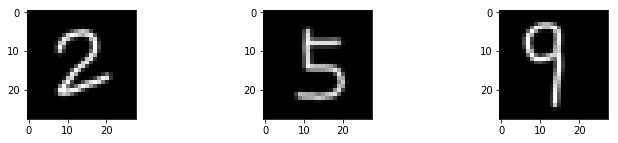

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /Users/larrysu/repos/totem/model/cnn_mnist_180329_112417_gpu/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
      2 ,       5 ,       3 , 
 0.9123 ,  0.8147 ,  0.2664 , 

In [11]:
# test_data = np.asarray(test_imgs, dtype=np.float16)
print(test_data.shape)
# print(test_imgs[0])
print(len(test_imgs))
fig=plt.figure(figsize=(12, 2))
for i in range(len(test_imgs)):
    img = test_imgs[i]
    fig.add_subplot(1, len(test_imgs), i+1)
    plt.imshow(img)
plt.show()

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": test_data},
        num_epochs=1,
        shuffle=False)

predictions = list(mnist_classifier.predict(input_fn=predict_input_fn))

class_prob = [(p["classes"], p["probabilities"][p["classes"]]) for p in predictions]
for cp in class_prob:
    print('%7d ' % cp[0], end=", ")

print()
for cp in class_prob:
    print(' %.4f ' % cp[1], end=", ")

In [12]:
predictions[2]

{'classes': 3,
 'probabilities': array([0.0002, 0.2631, 0.0131, 0.2664, 0.0985, 0.0086, 0.0006, 0.0698,
        0.2336, 0.0462], dtype=float32)}